<br>

# 온도 예측 모델
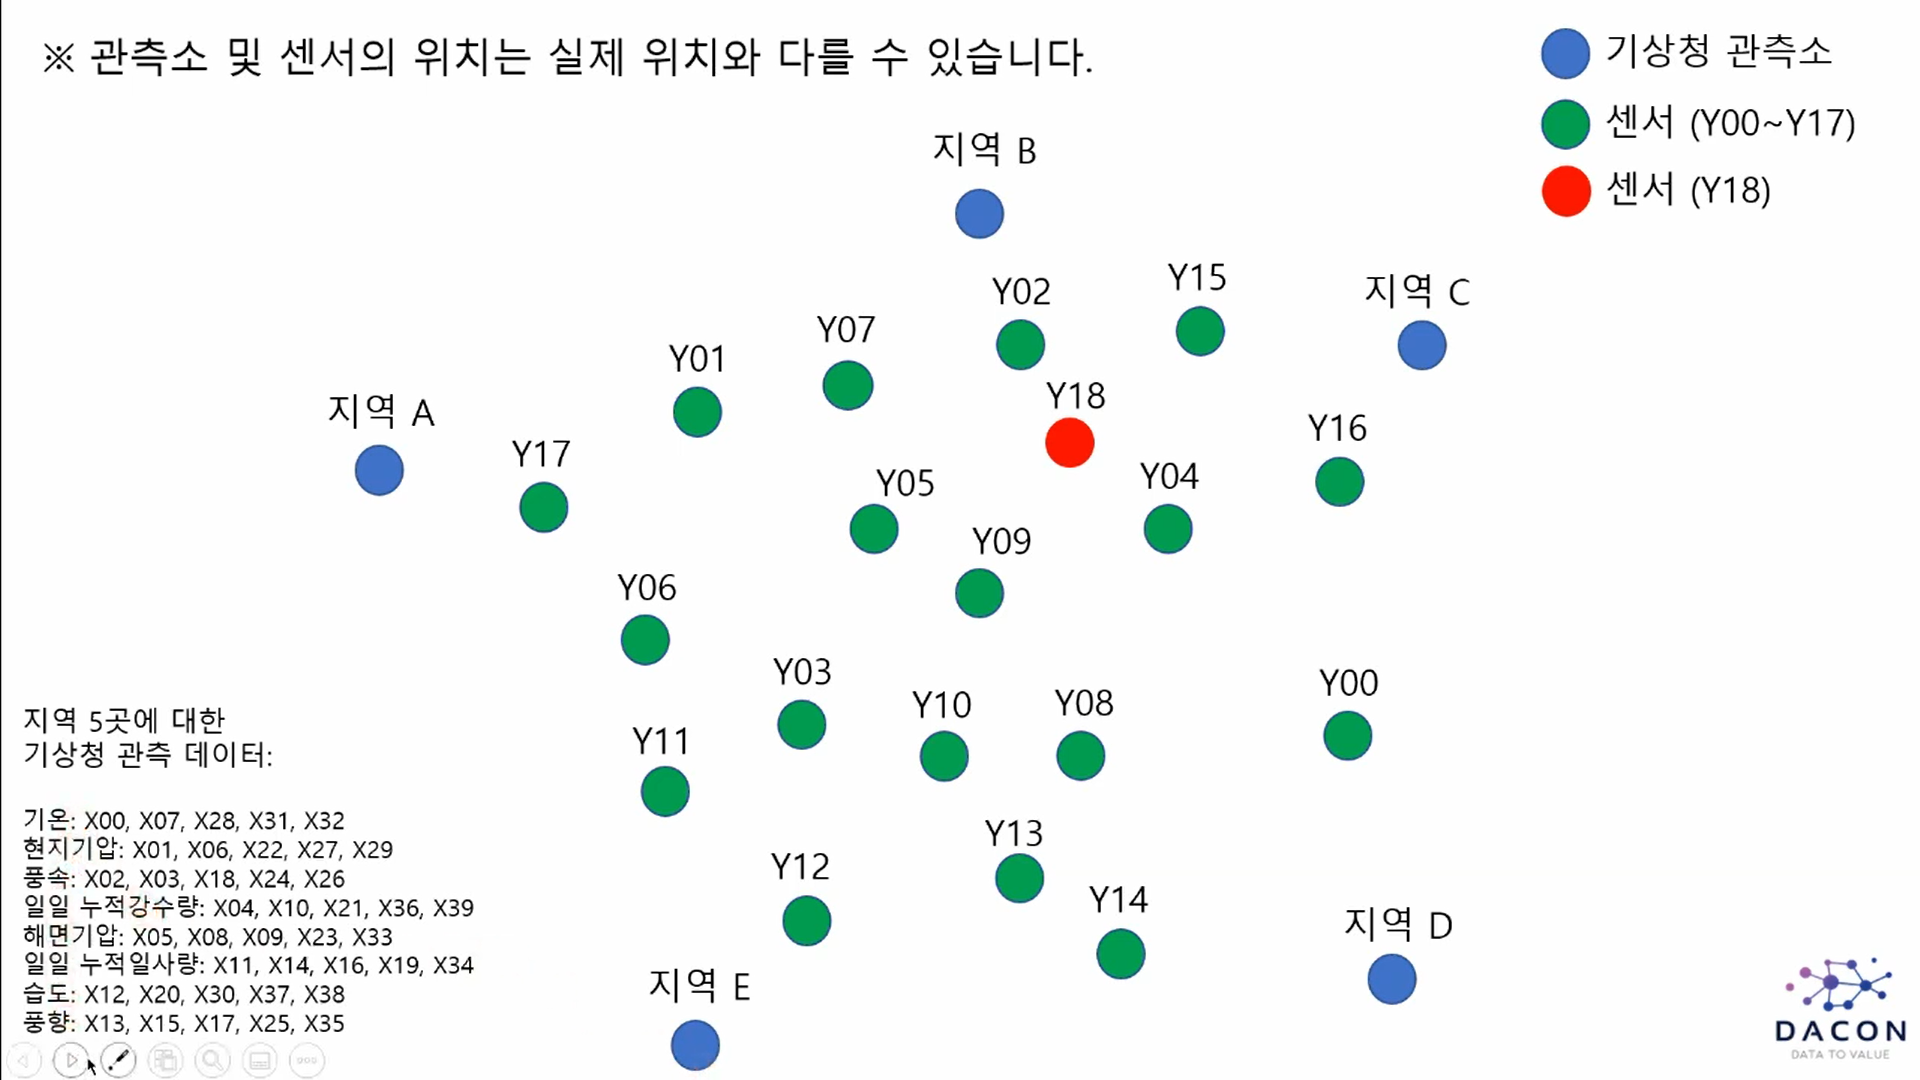

In [1]:
# 사용할 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 차트 기본값 설정(figre크기, 선 두께, 선 색깔, 차트의 격자 표시 유무)
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [3]:
# 데이터 불러오기
train_df = pd.read_csv('train.csv', encoding='utf-8')
test_df = pd.read_csv('test.csv', encoding='utf-8')
combine = [train_df, test_df]

In [4]:
train_df

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [5]:
test_df

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,...,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,...,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,...,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,...,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,...,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,...,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,...,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,...,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,...,77.3,25.3,24.2,1012.9,19.56,174.2,0.0,80.1,68.8,0.5


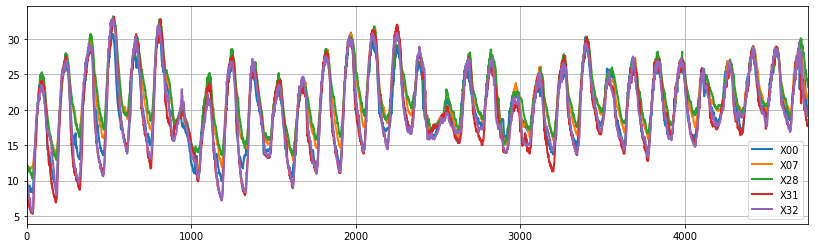

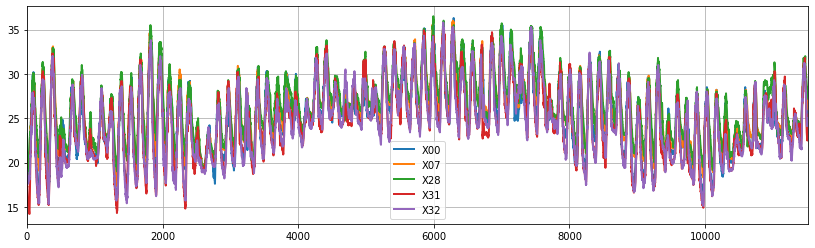

In [6]:
# 기온 그래프
train_df[['X00','X07','X28','X31','X32']].plot()
test_df[['X00','X07','X28','X31','X32']].plot()

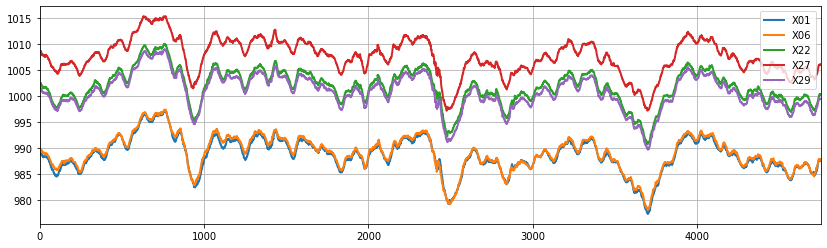

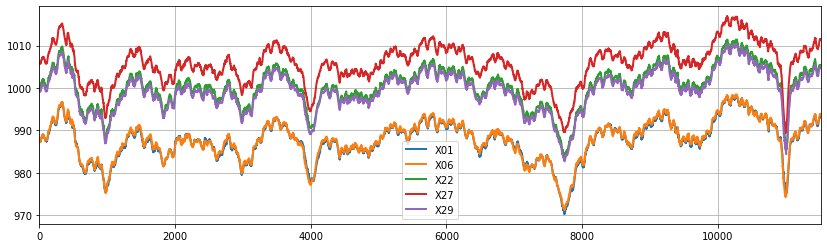

In [7]:
# 현지기압 그래프
train_df[['X01','X06','X22','X27','X29']].plot()
test_df[['X01','X06','X22','X27','X29']].plot()

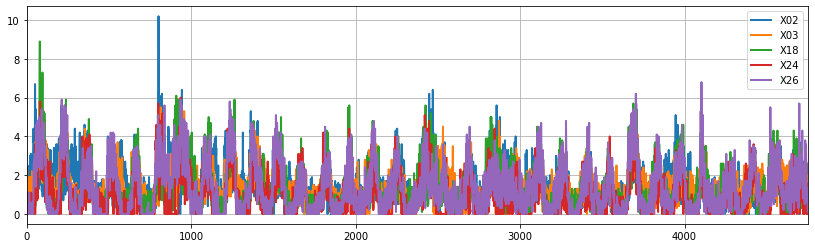

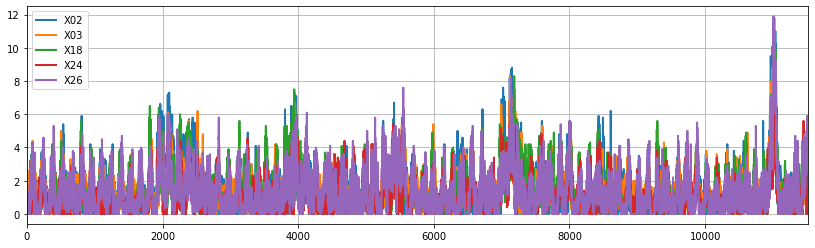

In [8]:
# 풍속 그래프
train_df[['X02','X03','X18','X24','X26']].plot()
test_df[['X02','X03','X18','X24','X26']].plot()

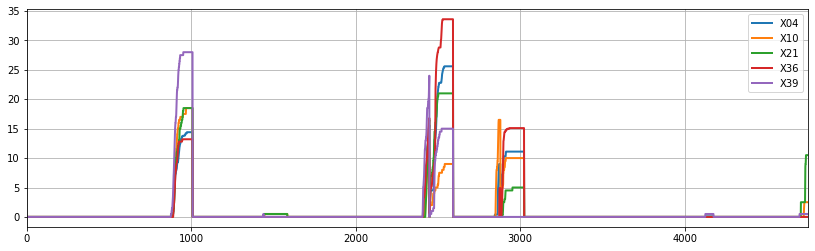

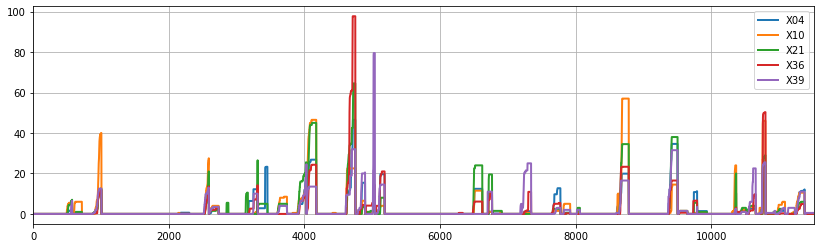

In [9]:
# 일일 누적강수량 그래프
train_df[['X04','X10','X21','X36','X39']].plot()
test_df[['X04','X10','X21','X36','X39']].plot()

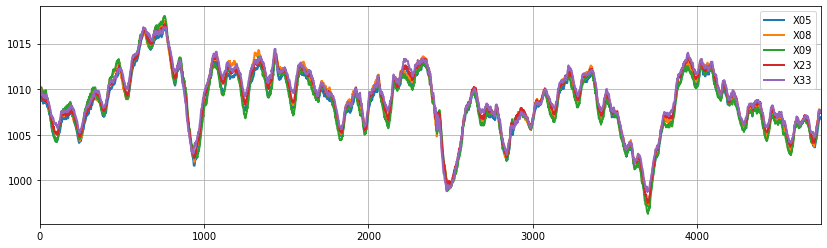

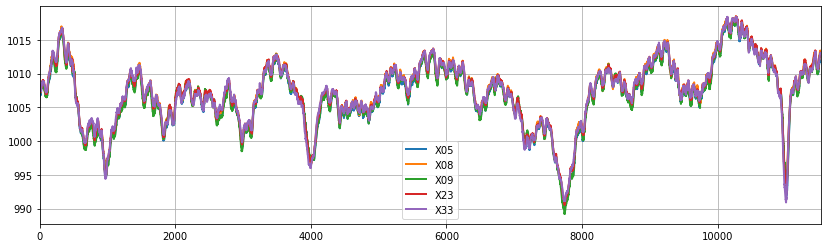

In [10]:
# 해면기압 그래프
train_df[['X05','X08','X09','X23','X33']].plot()
test_df[['X05','X08','X09','X23','X33']].plot()

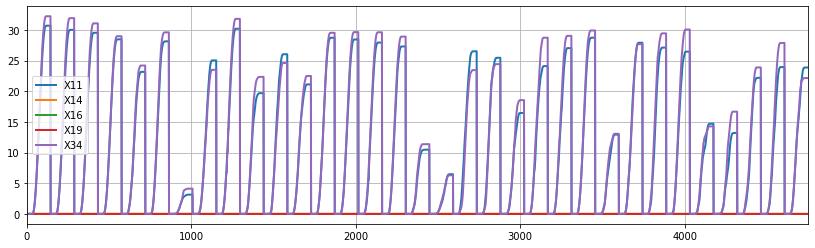

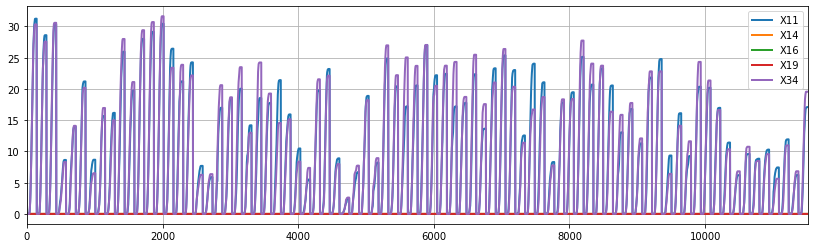

In [11]:
# 일일 누적일사량 그래프
train_df[['X11','X14','X16','X19','X34']].plot()
test_df[['X11','X14','X16','X19','X34']].plot()

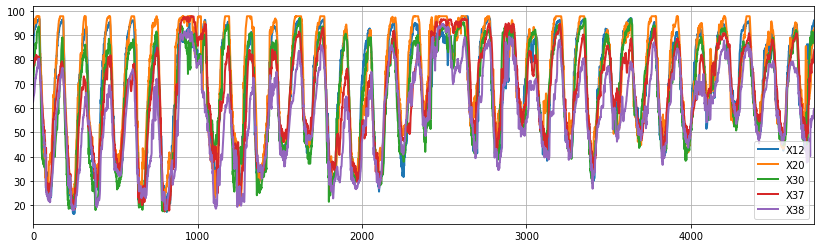

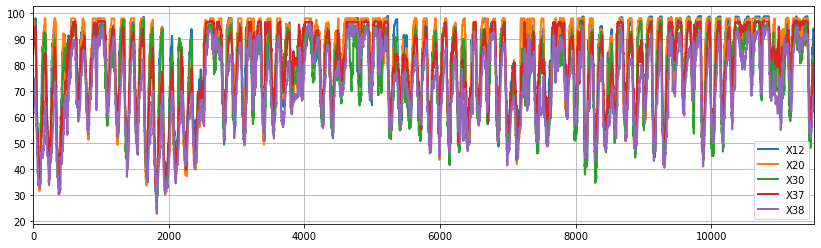

In [12]:
# 습도 그래프
train_df[['X12','X20','X30','X37','X38']].plot()
test_df[['X12','X20','X30','X37','X38']].plot()

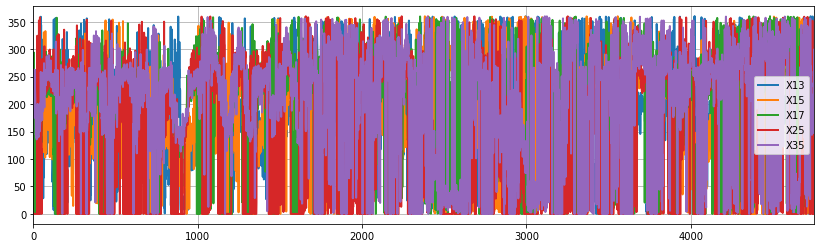

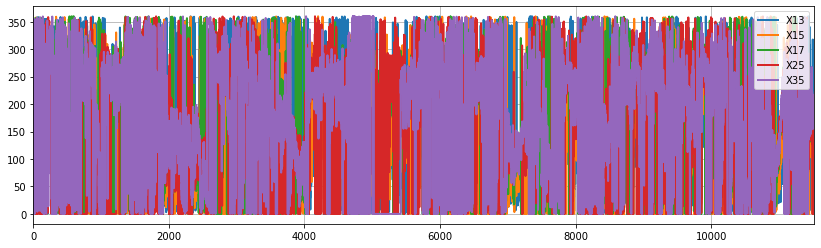

In [13]:
# 풍향 : 칼럼 드롭 예정
train_df[['X13','X15','X17','X25','X35']].plot()
test_df[['X13','X15','X17','X25','X35']].plot()

In [14]:
# 풍향 데이터 제거
train_df = train_df.drop(['X13','X15','X17','X25','X35'], axis=1)
test_df = test_df.drop(['X13','X15','X17','X25','X35'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((4752, 55), (11520, 36))

In [15]:
x_train = train_df.iloc[ :4320, 1:36]    # 4320 rows × 35 columns
y_train = train_df.iloc[ :4320, 36:-1]   # 4320 rows × 18 columns
x_test = train_df.iloc[4320:4752, 1:36]  # 432 rows × 35 columns

In [16]:
x_train

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X29,X30,X31,X32,X33,X34,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,1001.6,69.1,8.2,10.7,1010.1,0.00,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,1001.7,70.3,8.3,10.3,1010.1,0.00,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,1001.6,71.5,8.0,9.7,1010.0,0.00,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,1001.5,73.2,7.7,9.4,1010.1,0.00,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,1001.5,74.3,7.4,9.4,1010.1,0.00,0.0,78.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,1007.5,...,1000.1,82.3,18.8,19.4,1008.2,16.68,0.0,82.3,74.3,0.0
4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,1007.4,...,1000.1,85.8,18.6,18.5,1008.4,16.68,0.0,82.4,74.8,0.0
4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,1007.5,...,1000.2,84.1,18.4,19.1,1008.4,16.68,0.0,82.8,75.4,0.0
4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,1007.5,...,1000.0,85.4,18.2,19.0,1008.4,16.68,0.0,82.8,75.8,0.0


In [17]:
y_train

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0
4316,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5
4317,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0
4318,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0


In [18]:
x_test

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X29,X30,X31,X32,X33,X34,X36,X37,X38,X39
4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,1007.4,...,1000.1,87.6,18.0,18.7,1008.3,0.00,0.0,84.0,77.6,0.0
4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,1007.4,...,1000.1,86.4,17.7,19.0,1008.3,0.00,0.0,84.4,79.2,0.0
4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,1007.4,...,1000.1,85.7,17.4,19.2,1008.3,0.00,0.0,84.9,79.9,0.0
4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,1007.5,...,1000.1,85.1,17.5,19.3,1008.4,0.00,0.0,84.9,80.7,0.0
4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,1007.6,...,1000.2,84.9,17.4,19.5,1008.4,0.00,0.0,84.9,80.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,...,999.4,89.9,17.7,19.1,1007.5,22.16,0.0,82.3,58.6,0.5
4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,...,999.4,91.3,17.7,19.2,1007.5,22.16,0.0,82.5,59.1,0.5
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,...,999.5,90.2,17.8,19.2,1007.5,22.16,0.0,83.0,58.9,0.5
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,...,999.5,90.1,17.7,19.3,1007.6,22.16,0.0,83.2,59.8,0.5


In [19]:
x_train = x_train.values.astype('float32')
y_train = y_train.values.astype('float32')
x_test = x_test.values.astype('float32')

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
print(x_train.shape, y_train.shape, x_test.shape)

(4320, 35) (4320, 18) (432, 35)


In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

In [33]:
model.fit(x_train, y_train)

C:\Users\bruce0809\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [34]:
y_predict = model.predict(x_test)
y_predict

array([[21.05, 20.7 , 20.95, ..., 18.6 , 19.15, 18.5 ],
       [20.85, 20.45, 20.65, ..., 18.8 , 19.6 , 18.75],
       [20.45, 20.1 , 20.2 , ..., 19.1 , 19.9 , 19.1 ],
       ...,
       [22.05, 22.9 , 23.  , ..., 19.4 , 19.8 , 19.25],
       [22.  , 23.05, 23.1 , ..., 19.3 , 19.8 , 19.25],
       [22.05, 23.25, 23.3 , ..., 19.4 , 20.  , 19.4 ]])

In [35]:
y_predict.shape

(432, 18)

In [36]:
y_test = train_df.iloc[4320:4752, 54: ]
y_test

,Y18
4320,20.5
4321,20.5
4322,20.5
4323,20.5
4324,20.5
...,...
4747,21.5
4748,21.5
4749,21.5
4750,21.5


In [37]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import X

# model_2 = XGBRegressor(n_estimators=100)
model_2 = RandomForestRegressor(random_state=0)

In [39]:
model_2.fit(y_predict, y_test)

C:\Users\bruce0809\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bruce0809\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [41]:
print("훈련 세트 정확도 : {:.3f}".format(model_2.score(y_predict, y_test)))
print("특성 중요도: \n", model_2.feature_importances_)

훈련 세트 정확도 : 0.992
특성 중요도: 
 [0.00447944 0.00828842 0.01414006 0.00398486 0.00641548 0.03165204
 0.54059972 0.07959978 0.03376668 0.00611135 0.00597814 0.00964654
 0.03354293 0.00726867 0.01317407 0.11618815 0.00436576 0.08079791]


C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bruce0809\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Gl

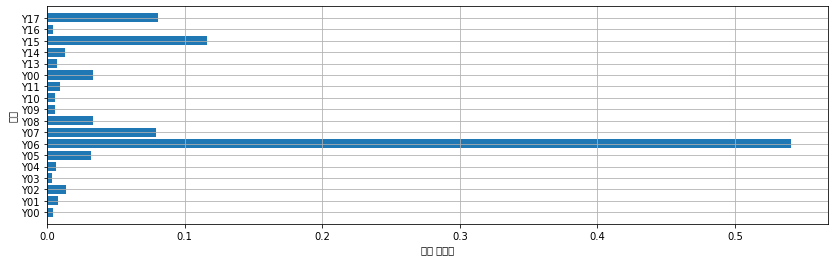

In [42]:
feature_names =['Y00','Y01','Y02','Y03','Y04','Y05',
                'Y06','Y07','Y08','Y09','Y10','Y11',
                'Y00','Y13','Y14','Y15','Y16','Y17']

def plot_feature_importances_cancer(model):
    n_features = 18
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(model_2)
plt.show()

In [43]:
Y18_predict = model_2.predict(y_train)

In [44]:
Y18_pred = Y18_predict.reshape(Y18_predict.shape[0], 1)

In [45]:
y_test.values.shape

(432, 1)

In [46]:
print(Y18_pred.shape)

(4320, 1)


In [47]:
combined_x = np.concatenate((y_train, y_predict), axis=0)
combined_y = np.concatenate((Y18_pred, y_test.values), axis=0)

In [48]:
print(combined_x.shape, combined_y.shape)

(4752, 18) (4752, 1)


In [49]:
test_df = test_df.iloc[ : , 1:36]
test_df = test_df.values.astype('float32')

In [50]:
test_df

array([[1.870e+01, 9.874e+02, 1.500e+00, ..., 8.400e+01, 5.990e+01,
        0.000e+00],
       [1.880e+01, 9.874e+02, 1.100e+00, ..., 8.400e+01, 6.050e+01,
        0.000e+00],
       [1.900e+01, 9.874e+02, 1.300e+00, ..., 8.500e+01, 6.080e+01,
        0.000e+00],
       ...,
       [2.560e+01, 9.932e+02, 3.800e+00, ..., 7.920e+01, 6.830e+01,
        5.000e-01],
       [2.550e+01, 9.932e+02, 2.400e+00, ..., 8.010e+01, 6.880e+01,
        5.000e-01],
       [2.540e+01, 9.932e+02, 3.000e+00, ..., 8.020e+01, 6.890e+01,
        5.000e-01]], dtype=float32)

In [58]:
test_x = scaler.transform(test_df)
test_x

array([[-0.26674622, -0.42128733, -0.04123548, ...,  0.9337507 ,
         0.12283932, -0.24540019],
       [-0.24566992, -0.42128733, -0.40852883, ...,  0.9337507 ,
         0.15493691, -0.24540019],
       [-0.20351647, -0.42128733, -0.2248822 , ...,  0.98388255,
         0.1709857 , -0.24540019],
       ...,
       [ 1.1875421 ,  1.2709651 ,  2.0707014 , ...,  0.6931174 ,
         0.57220685, -0.14188209],
       [ 1.1664654 ,  1.2709651 ,  0.78517467, ...,  0.7382362 ,
         0.5989549 , -0.14188209],
       [ 1.1453887 ,  1.2709651 ,  1.3361145 , ...,  0.7432493 ,
         0.60430443, -0.14188209]], dtype=float32)

In [59]:
# 테스트 모델 예측해보기
test_x_predict = model.predict(test_x)
test_x_predict

array([[21.5 , 21.2 , 21.4 , ..., 18.5 , 18.65, 18.35],
       [21.5 , 21.15, 21.4 , ..., 18.5 , 18.7 , 18.3 ],
       [21.65, 21.25, 21.55, ..., 18.6 , 18.7 , 18.3 ],
       ...,
       [25.4 , 30.65, 30.25, ..., 24.5 , 26.9 , 26.75],
       [24.9 , 28.95, 28.55, ..., 23.3 , 25.5 , 25.  ],
       [24.9 , 28.95, 28.55, ..., 23.3 , 25.5 , 25.  ]])

In [60]:
test_y_predict = model_2.predict(test_x_predict)

In [61]:
test_y_predict

array([20.65, 20.65, 20.7 , ..., 27.35, 25.5 , 25.5 ])

In [62]:
test_x_predict.shape

(11520, 18)

In [56]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_y_predict.reshape(1,-1)[0]})
submit.to_csv('FIRST_result.csv', index = False)

In [66]:
print(test_x.shape, test_x_predict.shape)

(11520, 35) (11520, 18)


In [67]:
test_x[:, ]

In [70]:
y.shape

(11474, 35)